Under the gavitional force and the air resistance force, projectile's equation of motion can be written down

$\frac{d^{2}x}{dt^{2}}	=-\gamma\frac{dx}{dt}$  
$\frac{d^{2}y}{dt^{2}}	=-\gamma\frac{dy}{dt}-g$

Let's define $t'=t\gamma$ and plug it into the equation

$\frac{d^{2}x}{dt'^{2}}	=-\frac{dx}{dt'}$  
$\frac{d^{2}y}{dt'^{2}}	=-\frac{dy}{dt'}-\frac{g}{\gamma^{2}}$

First differential equation is homogenerous equation also the trival one

$x=\frac{u}{\gamma}\left(1-e^{-t'}\right)$

To solve the second differential equation, we can use the Laplace tranformation

$s^{2}Y\left(s\right)-sy\left(0\right)-y'\left(0\right)=-sY\left(s\right)-y\left(0\right)-\frac{g}{\gamma^{2}s}$

and our initial condition is $y'\left(0\right)=\frac{v}{\gamma}$ and $y\left(0\right)=0$, the equation becomes

$s^{2}Y\left(s\right)+sY\left(s\right)=\frac{v}{\gamma}-\frac{g}{\gamma^{2}s}$

$Y\left(s\right)=\frac{v}{\gamma s\left(s+1\right)}-\frac{g}{\gamma^{2}s^{2}\left(s+1\right)}$

$Y\left(s\right)=\frac{v}{s\gamma}-\frac{v}{\gamma\left(s+1\right)}-\frac{g}{\gamma^{2}s^{2}}+\frac{g}{\gamma^{2}\left(s^{2}+s\right)}$

$Y\left(s\right)=\frac{v}{s\gamma}-\frac{v}{\gamma\left(s+1\right)}-\frac{g}{\gamma^{2}s^{2}}+\frac{g}{\gamma^{2}\left(s^{2}+s+\frac{1}{4}\right)-\frac{\gamma^{2}}{4}}$

and then, we can tranform back the time domain

$y\left(t'\right)=\frac{v\left(1-e^{-t'}\right)}{\gamma}-\frac{gt'}{\gamma^{2}}+\frac{2g}{\gamma^{2}}e^{-\frac{1}{2}t'}\sinh\left(\frac{1}{2}t'\right)$  
To solve this equation, we define $V=\frac{v\gamma}{g}$

$\frac{v\left(1-e^{-t'}\right)}{\gamma}-\frac{gt'}{\gamma^{2}}+\frac{2g}{\gamma^{2}}e^{-\frac{1}{2}t'}\sinh\left(\frac{1}{2}t'\right)=0$

After rearrange, it will become

$V\left(1-e^{-T}\right)-T+\left(1-e^{-T'}\right)=0$



In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize

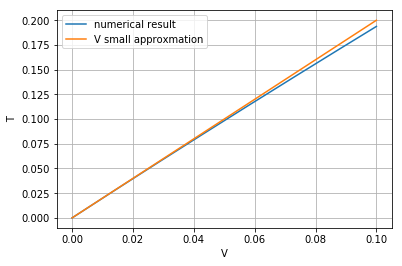

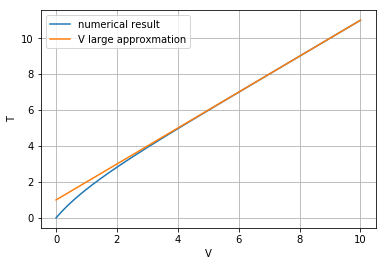

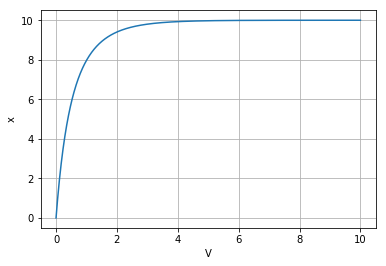

In [2]:
def fun(x,V):
    g=9.8
    return (V+1)*(1-np.exp(-x))-x#+(np.sign(-x+0.000001)+1)/0.5

def displace(x,U):
    return (1-np.exp(-x))*U #Where U is the \gamma*u

def Ts(V):
    return 2*V#/(V+1)

def Tl(v):
    return v+1

y=np.linspace(0,1,1001)
z=np.zeros(1001)
w=np.zeros(1001)
o1=np.zeros(1001)
o2=np.zeros(1001)
o3=np.zeros(1001)
#sol = optimize.root(fun, [5,],args=(10), method='hybr')
#print(sol.x)
for i in range(1001):
    V=i/10000
    sol = optimize.root(fun, [5,],args=(V), method='hybr')
    z[i]=sol.x
    V1=i/100
    sol = optimize.root(fun, [5,],args=(V1), method='hybr')
    w[i]=sol.x
    o1[i]=displace(w[i],10) #(u=10,gamma=0.5)
    #o2[i]=displace(w[i],10,1.0) #(u=10,gamma=1.0)
    #o3[i]=displace(w[i],10,5.0) #(u=10,gamma=5.0)
#plt.subplot(2, 1, 1)
plt.plot(y/10,z,label='numerical result')
plt.plot(y/10,Ts(y/10),label='V small approxmation')
plt.xlabel('V',fontsize=10)
plt.ylabel('T',fontsize=10)
plt.grid(True)
plt.legend()
plt.show()

#plt.subplot(2, 1, 2)
plt.plot(y*10,w,label='numerical result')
plt.plot(y*10,Tl(y*10),label='V large approxmation')
plt.xlabel('V',fontsize=10)
plt.ylabel('T',fontsize=10)
plt.grid(True)
plt.legend()
plt.show()

plt.plot(10*y,o1)
plt.xlabel('V',fontsize=10)
plt.ylabel('x',fontsize=10)
plt.grid(True)
plt.show()


When $V\ll1$, the T-V relation is like linear relation $T_{f}=2V$. When $V\gg1$ , the T-V relation is like linear relation $T=V+1$ because the expontential term is small one.

In [3]:
np.e**2/8

0.9236320123663312